In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('data.csv', encoding="ISO-8859-1")

print('\n\nHead:')
print(data.head())
print('\n\nInfo:')
print(data.info())
print('\n\nDescribe:')
print(data.describe())
print('\n\nNulls:')
print(data.isnull().sum())



Head:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data column

In [3]:
# Convert string columns to categorical
from sklearn.calibration import LabelEncoder


for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = LabelEncoder().fit_transform(data[column])


In [4]:
# for each column print the number of unique values, and if less than 10, print the unique values
for column in data.columns:
    print(f'{column}: {data[column].nunique()} unique values: {data[column].unique()}')

price: 219 unique values: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  49350

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('price', axis=1)
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [6]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(scaled_X_train, Y_train)

Y_pred = model.predict(scaled_X_test)
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_pred)}')

Mean absolute error: 769434.8480935177


In [7]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_pred)}')

Mean absolute error: 794171.3639143731


In [8]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_pred)}')

Mean absolute error: 1024884.7706422019


In [9]:
# Find out the most important features in X_train
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    column_name = X_train.columns[indices[f]]
    print("%d. feature %s (%f)" % (f + 1, column_name, importances[indices[f]]))

1. feature area (0.445357)
2. feature bathrooms (0.181975)
3. feature airconditioning (0.060426)
4. feature stories (0.052304)
5. feature furnishingstatus (0.049842)
6. feature bedrooms (0.045901)
7. feature prefarea (0.043759)
8. feature parking (0.042677)
9. feature basement (0.030903)
10. feature hotwaterheating (0.022612)
11. feature guestroom (0.020628)
12. feature mainroad (0.003616)


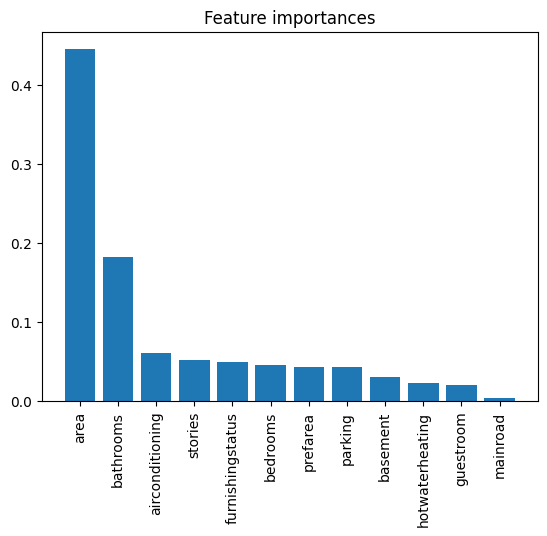

In [10]:
# Plot the feature importances with the column names
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [11]:
# Train a decision tree to predict Churn using only the 3 most important features
X_train_important = X_train[X_train.columns[indices[:3]]]
X_test_important = X_test[X_test.columns[indices[:3]]]

model_important = DecisionTreeRegressor()
model_important.fit(X_train_important, Y_train)

Y_pred = model_important.predict(X_test_important)
print(f'Mean absolute error: {mean_absolute_error(Y_test, Y_pred)}')

Mean absolute error: 1274538.3180428133
